In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import os
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [20]:

sns.set_context("paper")

color_set=['deep','muted','pastel','bright','dark','colorblind']
sns.set_palette(color_set[1])




large=12
med=9
small=6
ss=10
sss=8
ssss=6



matplotlib.rcParams['figure.figsize']=(3.2,2.8)
matplotlib.rcParams['figure.dpi'] = 600

matplotlib.rcParams['font.sans-serif'] = ['Arial']   
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.style']='normal'   # normal (or roman), italic or oblique
matplotlib.rcParams['font.weight']='bold'   # normal bold bolder lighter, 100, 200, 300, ..., 900
matplotlib.rcParams["axes.labelweight"] = "bold"

matplotlib.rcParams['axes.titlesize'] =sss
#matplotlib.rcParams['axes.titlepad'] =-0.5
matplotlib.rcParams['legend.fontsize'] =ss
matplotlib.rcParams['axes.labelsize'] =ss
matplotlib.rcParams['xtick.labelsize'] =ss
matplotlib.rcParams['ytick.labelsize'] = ss
matplotlib.rcParams['figure.titlesize'] =sss


matplotlib.rcParams['xtick.major.width'] = 0.6
matplotlib.rcParams['ytick.major.width'] = 0.6

matplotlib.rcParams['xtick.major.size'] = 1.3
matplotlib.rcParams['ytick.major.size'] = 1.3

matplotlib.rcParams['xtick.major.pad'] = 1.5
matplotlib.rcParams['ytick.major.pad'] = 1.5



matplotlib.rcParams['axes.linewidth'] = 0.6

matplotlib.rcParams['lines.linewidth'] = 1.0
#matplotlib.rcParams['lines.markersize'] = 1.2

scatter_s=20


ref_line_color=['#4d4d4d', 'red']
ref_line_size=0.8

#matplotlib.rcParams['xtick.direction'] = 'in'

In [21]:
data_train = pd.read_excel('data_train.xlsx')
data_test = pd.read_excel('data_test.xlsx')
data_final_test = pd.read_excel('data_final_test.xlsx')

In [22]:
#print(data_train.info())
#print(data_test.info())

#data_train = data_train.astype(float)
#data_test = data_test.astype(float)

In [23]:
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

X_col = X_train.columns


X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]


X_final_test = data_final_test.iloc[:,1:]
y_final_test = data_final_test.iloc[:,0]

In [24]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

scaler.fit(X_train)  

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train_standard,columns=X_col)
X_test_standard = pd.DataFrame(X_test_standard,columns=X_col)

In [25]:
X_train_standard_np = X_train_standard.values
X_test_standard_np = X_test_standard.values
y_train_np = y_train.values
y_test_np = y_test.values
y_final_test_np = y_final_test.values

Mean Absolute Error MAE: 0.005407081382251844
test rmse scores :  0.007054666111851603
test R2 scores :  0.9800414793739202


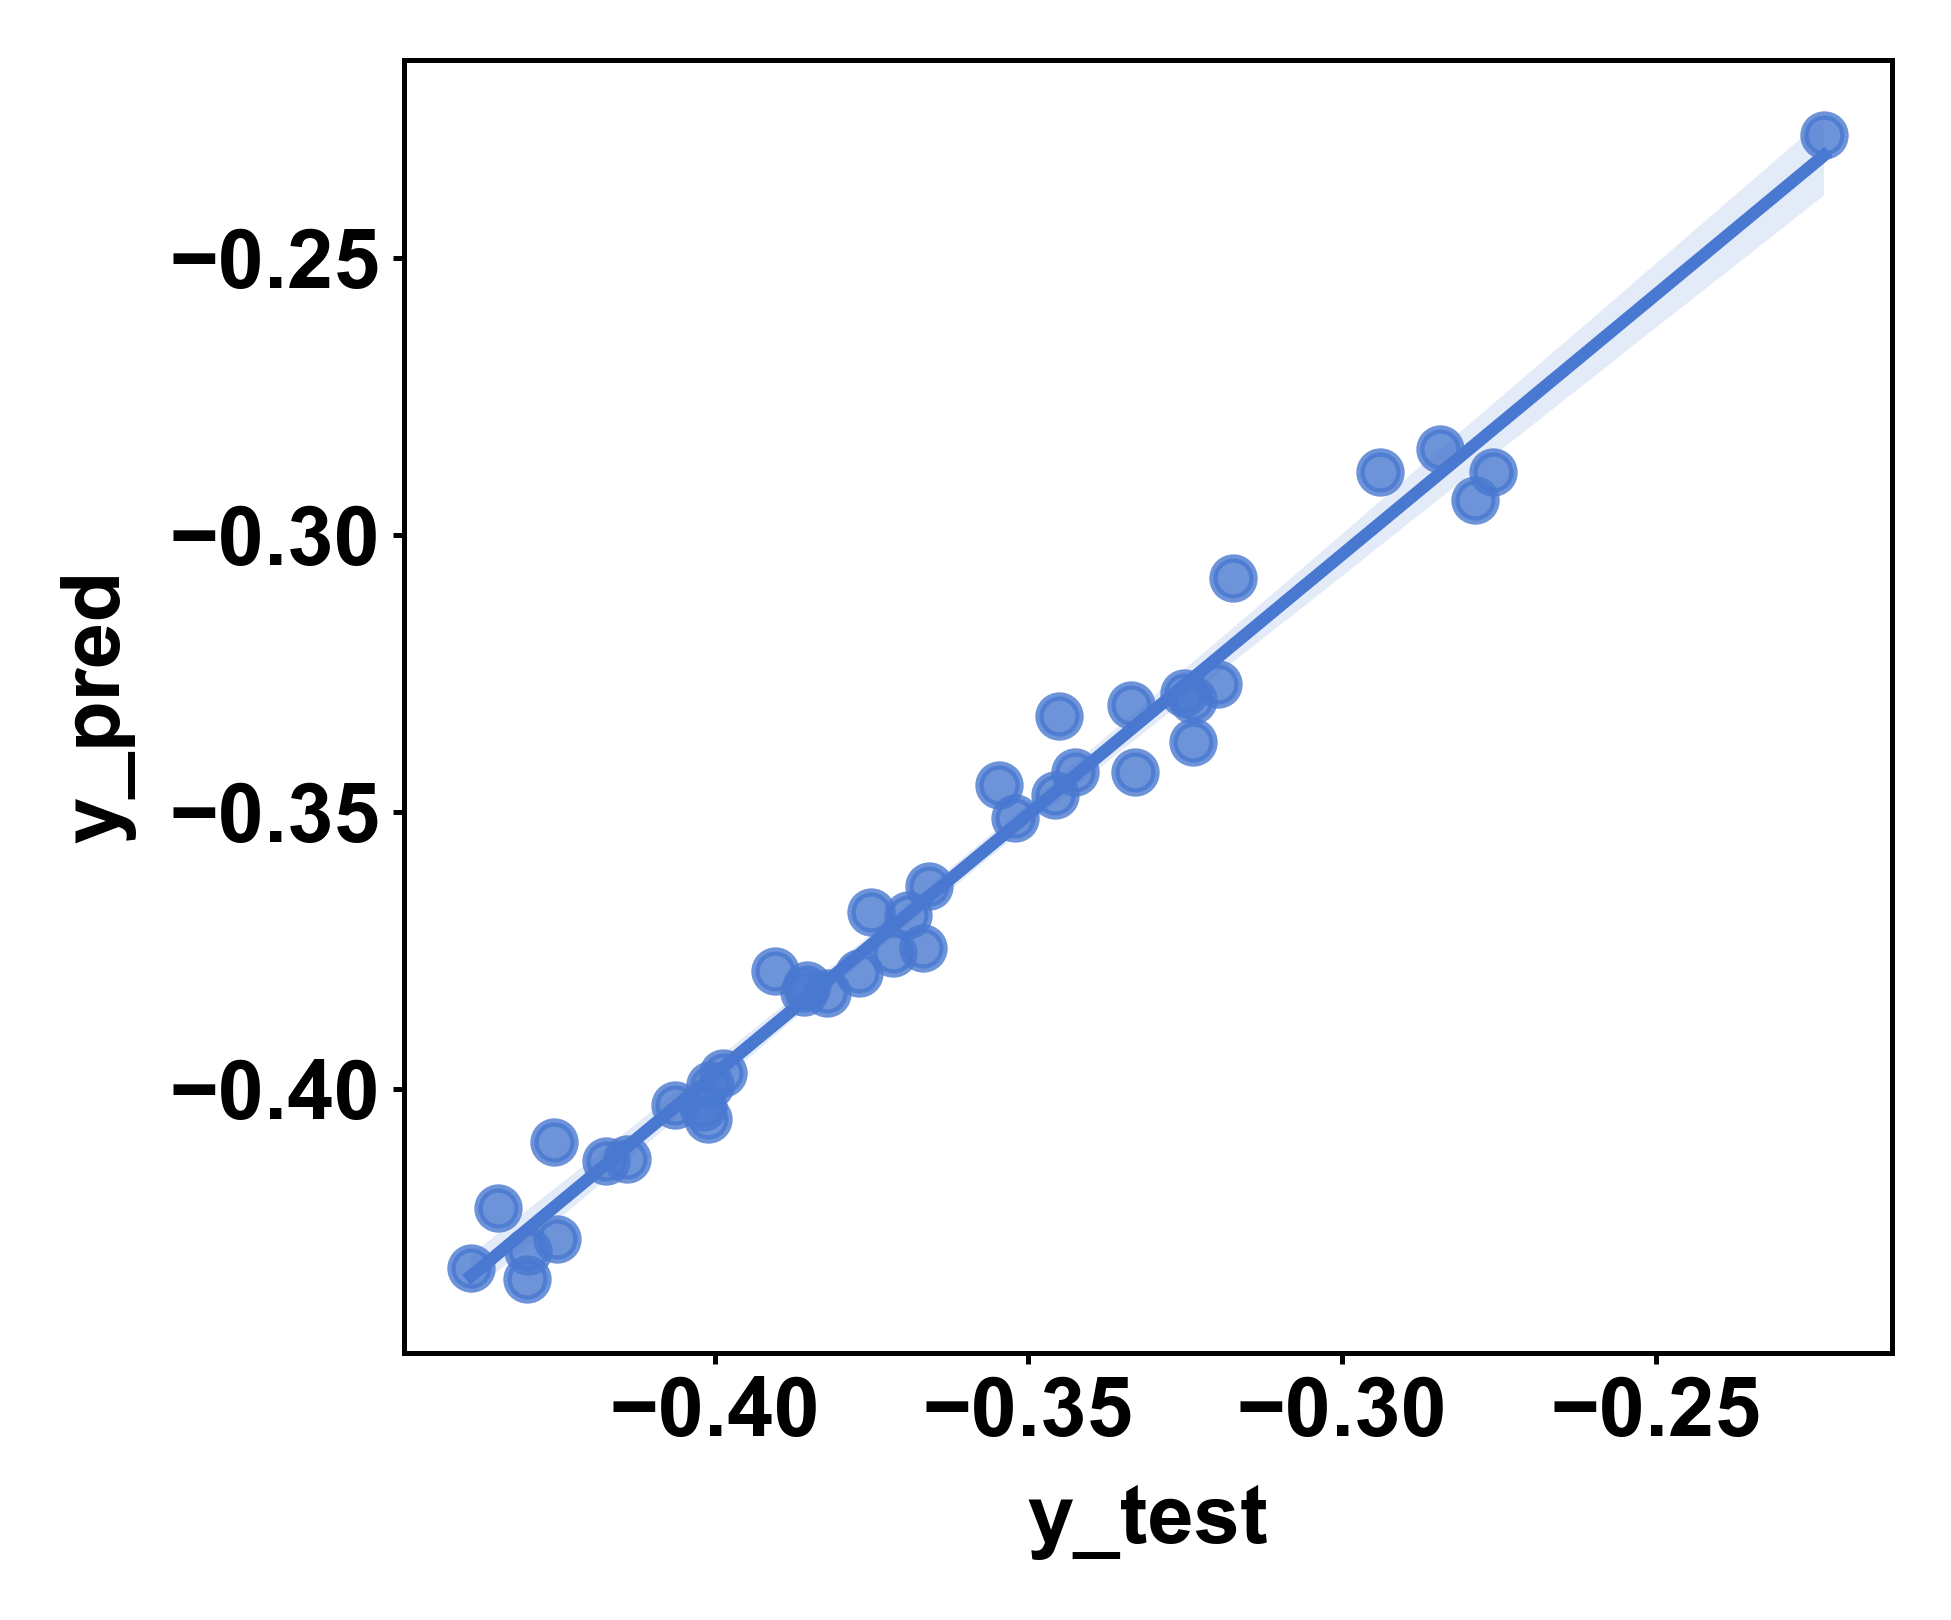

In [26]:

from sklearn.linear_model import Ridge
Ridge_default = Ridge()
Ridge_default.fit(X_train_standard_np,y_train_np)
y_pred_default=Ridge_default.predict(X_test_standard_np)


x_1,y_1=pd.Series(y_test_np,name='y_test'),pd.Series(y_pred_default,name='y_pred')
sns.regplot(x=x_1,y=y_1)
plt.show


#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_test_np,y_pred_default))
r2 = r2_score(y_test_np,y_pred_default)


print(f'Mean Absolute Error MAE: {mean_absolute_error(y_test_np,y_pred_default)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

In [27]:
print(Ridge_default.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


alphas = np.logspace(-6, 6, 13)
r2_scores_totle = []
alpha_storage = []
screen_data =[]
kf = KFold(n_splits=5, shuffle=True, random_state=1 )

for i in alphas:
    RI_KF = Ridge(alpha=i)
    alpha_storage.append(i)
    r2_scores = []
    for train, test in kf.split(X_train_standard_np):
        X_train_k, X_test_k = X_train_standard_np[train], X_train_standard_np[test]
        y_train_k, y_test_k = y_train_np[train], y_train_np[test]
        RI_KF.fit(X_train_k,y_train_k)
        y_pred_k=RI_KF.predict(X_test_k)
        r2 = r2_score(y_test_k,y_pred_k)
        r2_scores.append(r2)
    print(i)
    print(r2_scores)
    average = np.mean(r2_scores)
    screen_data.append({i:average})
    r2_scores_totle.append(r2_scores)

max_data = max(screen_data, key=lambda x: list(x.values())[0])
x=float(list(max_data.keys())[0])
print(x)

1e-06
[0.9742621158828504, 0.9724228105995252, 0.9653858559830885, 0.949947463056745, 0.9623942610857903]
1e-05
[0.9742620949646448, 0.9724228169102906, 0.9653858658731285, 0.9499474872049806, 0.9623942626076744]
0.0001
[0.9742618857914092, 0.9724228800088289, 0.9653859647630352, 0.9499477286663716, 0.9623942778209599]
0.001
[0.9742597949406658, 0.9724235100833735, 0.9653869526134201, 0.9499501411860622, 0.9623944293987192]
0.01
[0.9742389742142787, 0.9724297204033141, 0.9653967268923852, 0.9499740591460152, 0.9623958900608479]
0.1
[0.9740391753953833, 0.972483395003713, 0.9654846521906235, 0.9501945113360206, 0.9624053536187153]
1.0
[0.9726081274264101, 0.9725296787009772, 0.965750770246388, 0.9515256799769674, 0.9622002813330754]
10.0
[0.9649674678936875, 0.9646001836018944, 0.9571563479901527, 0.9554310814181102, 0.9551208429857041]
100.0
[0.8857907511454338, 0.8516750098063439, 0.8374538305839996, 0.8891245226696527, 0.8432900036985727]
1000.0
[0.4634254385807962, 0.374454466111002

In [29]:
data = pd.read_excel('data_final.xlsx')

#data = data.astype(float)
#data.info()


X_all = data.iloc[:,1:]
X_all_colums=X_all.columns
y_all = data.iloc[:,0]


X_all_np=X_all.values
y_all_np=y_all.values

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
RI_all = Ridge(alpha=float(list(max_data.keys())[0]))


feature_imp_set=[]
feature_imp_set_noabs=[]


train_rmse_scores = []
train_r2_scores = []
train_mae_scores = []

test_rmse_scores = []
test_r2_scores = []
test_mae_scores = []

final_test_rmse_scores = []
final_test_r2_scores = []
final_test_mae_scores = []


n = 20


for i in range(n):
    X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=True, random_state=i)

    
    scaler_all.fit(X_all_train)
    X_all_train_standard = scaler_all.transform(X_all_train)
    X_all_test_standard = scaler_all.transform(X_all_test)
    X_final_test_standard_all = scaler_all.transform(X_final_test)
    
    RI_all.fit(X_all_train_standard, y_all_train)

    y_all_train_pred = RI_all.predict(X_all_train_standard)
    train_rmse = np.sqrt(mean_squared_error(y_all_train, y_all_train_pred))
    train_rmse_scores.append(train_rmse) 
    train_r2 = r2_score(y_all_train, y_all_train_pred)
    train_r2_scores.append(train_r2)
    train_mae = mean_absolute_error(y_all_train, y_all_train_pred)
    train_mae_scores.append(train_mae)

    y_all_test_pred = RI_all.predict(X_all_test_standard)
    test_rmse = np.sqrt(mean_squared_error(y_all_test, y_all_test_pred))
    test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_all_test, y_all_test_pred)
    test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_all_test, y_all_test_pred)
    test_mae_scores.append(test_mae)

    y_final_test_pred_all = RI_all.predict(X_final_test_standard_all)
    test_rmse = np.sqrt(mean_squared_error(y_final_test_np, y_final_test_pred_all))
    final_test_rmse_scores.append(test_rmse)
    test_r2 = r2_score(y_final_test_np, y_final_test_pred_all)
    final_test_r2_scores.append(test_r2)
    test_mae = mean_absolute_error(y_final_test_np, y_final_test_pred_all)
    final_test_mae_scores.append(test_mae)

    feature_imp=RI_all.coef_
    feature_imp_abs=np.abs(feature_imp)
    feature_imp_set_noabs.append(feature_imp)
    feature_imp_set.append(feature_imp_abs)



results_dict = {
    'method': ['RI'] * (3 * n),
    'set_type': ['Train'] * n + ['Test'] * n + ['Final_Test'] * n,
    'MAE': train_mae_scores + test_mae_scores + final_test_mae_scores,
    'RMSE': train_rmse_scores + test_rmse_scores + final_test_rmse_scores,
    'R2': train_r2_scores + test_r2_scores + final_test_r2_scores
}
results_df = pd.DataFrame(results_dict)

excel_filename = 'model_evaluation_results_all.xlsx'
results_df.to_excel(excel_filename, index=False)

In [31]:

print('train set:')
print(f'Average MAE score: {np.mean(train_mae_scores):.4f} ± {np.std(train_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(train_rmse_scores):.4f} ± {np.std(train_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(train_r2_scores):.4f} ± {np.std(train_r2_scores):.4f}')

print('\ntest set:')
print(f'Average MAE score: {np.mean(test_mae_scores):.4f} ± {np.std(test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(test_rmse_scores):.4f} ± {np.std(test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(test_r2_scores):.4f} ± {np.std(test_r2_scores):.4f}')

print('\nindependent test set:')
print(f'Average MAE score: {np.mean(final_test_mae_scores):.4f} ± {np.std(final_test_mae_scores):.4f}')
print(f'Average RMSE score: {np.mean(final_test_rmse_scores):.4f} ± {np.std(final_test_rmse_scores):.4f}')
print(f'Average R2 score: {np.mean(final_test_r2_scores):.4f} ± {np.std(final_test_r2_scores):.4f}')

print(f'\nResults have been saved to {excel_filename}')


print('\nDataFrame preview:')
print(results_df.head())


#
print('best test set:')
min_mae = min(test_mae_scores)
min_mae_index = test_mae_scores.index(min_mae)
print('min MAE score:', min_mae, '    ', 'random_state=', min_mae_index)

min_rmse = min(test_rmse_scores)
min_rmse_index = test_rmse_scores.index(min_rmse)
print('min RMSE score:', min_rmse, '    ', 'random_state=', min_rmse_index)

max_r2 = max(test_r2_scores)
max_r2_index = test_r2_scores.index(max_r2)
print('max R2 score:', max_r2, '    ', 'random_state=', max_r2_index)

print('independent test set')
final_min_mae = min(final_test_mae_scores)
final_min_mae_index = final_test_mae_scores.index(final_min_mae)
print('min MAE score:', final_min_mae, '    ', 'random_state=', final_min_mae_index)

final_min_rmse = min(final_test_rmse_scores)
final_min_rmse_index = final_test_rmse_scores.index(final_min_rmse)
print('min RMSE score:', final_min_rmse, '    ', 'random_state=', final_min_rmse_index)

final_max_r2 = max(final_test_r2_scores)
final_max_r2_index = final_test_r2_scores.index(final_max_r2)
print('max R2 score:', final_max_r2, '    ', 'random_state=', final_max_r2_index)

train set:
Average MAE score: 0.0055 ± 0.0001
Average RMSE score: 0.0066 ± 0.0001
Average R2 score: 0.9732 ± 0.0016

test set:
Average MAE score: 0.0056 ± 0.0005
Average RMSE score: 0.0068 ± 0.0005
Average R2 score: 0.9720 ± 0.0071

independent test set:
Average MAE score: 0.0059 ± 0.0002
Average RMSE score: 0.0075 ± 0.0001
Average R2 score: 0.9190 ± 0.0032

Results have been saved to model_evaluation_results_all.xlsx

DataFrame preview:
  method set_type       MAE      RMSE        R2
0     RI    Train  0.005500  0.006682  0.971986
1     RI    Train  0.005514  0.006554  0.970349
2     RI    Train  0.005642  0.006714  0.971684
3     RI    Train  0.005408  0.006622  0.972486
4     RI    Train  0.005483  0.006633  0.971542
best test set:
min MAE score: 0.004954068464084076      random_state= 13
min RMSE score: 0.006106072065543457      random_state= 7
max R2 score: 0.9800414793739202      random_state= 1
independent test set
min MAE score: 0.00562574711939341      random_state= 3
min RMSE

   feature  average_importance     error
9    MSD_E            0.000754  0.000787
0     Mo_F            0.000806  0.000382
5    AVE_R            0.001052  0.000428
3      W_F            0.002122  0.000402
10   MSD_M            0.002358  0.000339
11   S_MIX            0.002536  0.000374
2     Rh_F            0.002741  0.000516
6    AVE_E            0.003287  0.000484
4     Ir_F            0.006118  0.000473
7    AVE_M            0.007050  0.000305
8    MSD_R            0.008400  0.000884
1     Ru_F            0.010295  0.000294
12   H_MIX            0.027398  0.000969


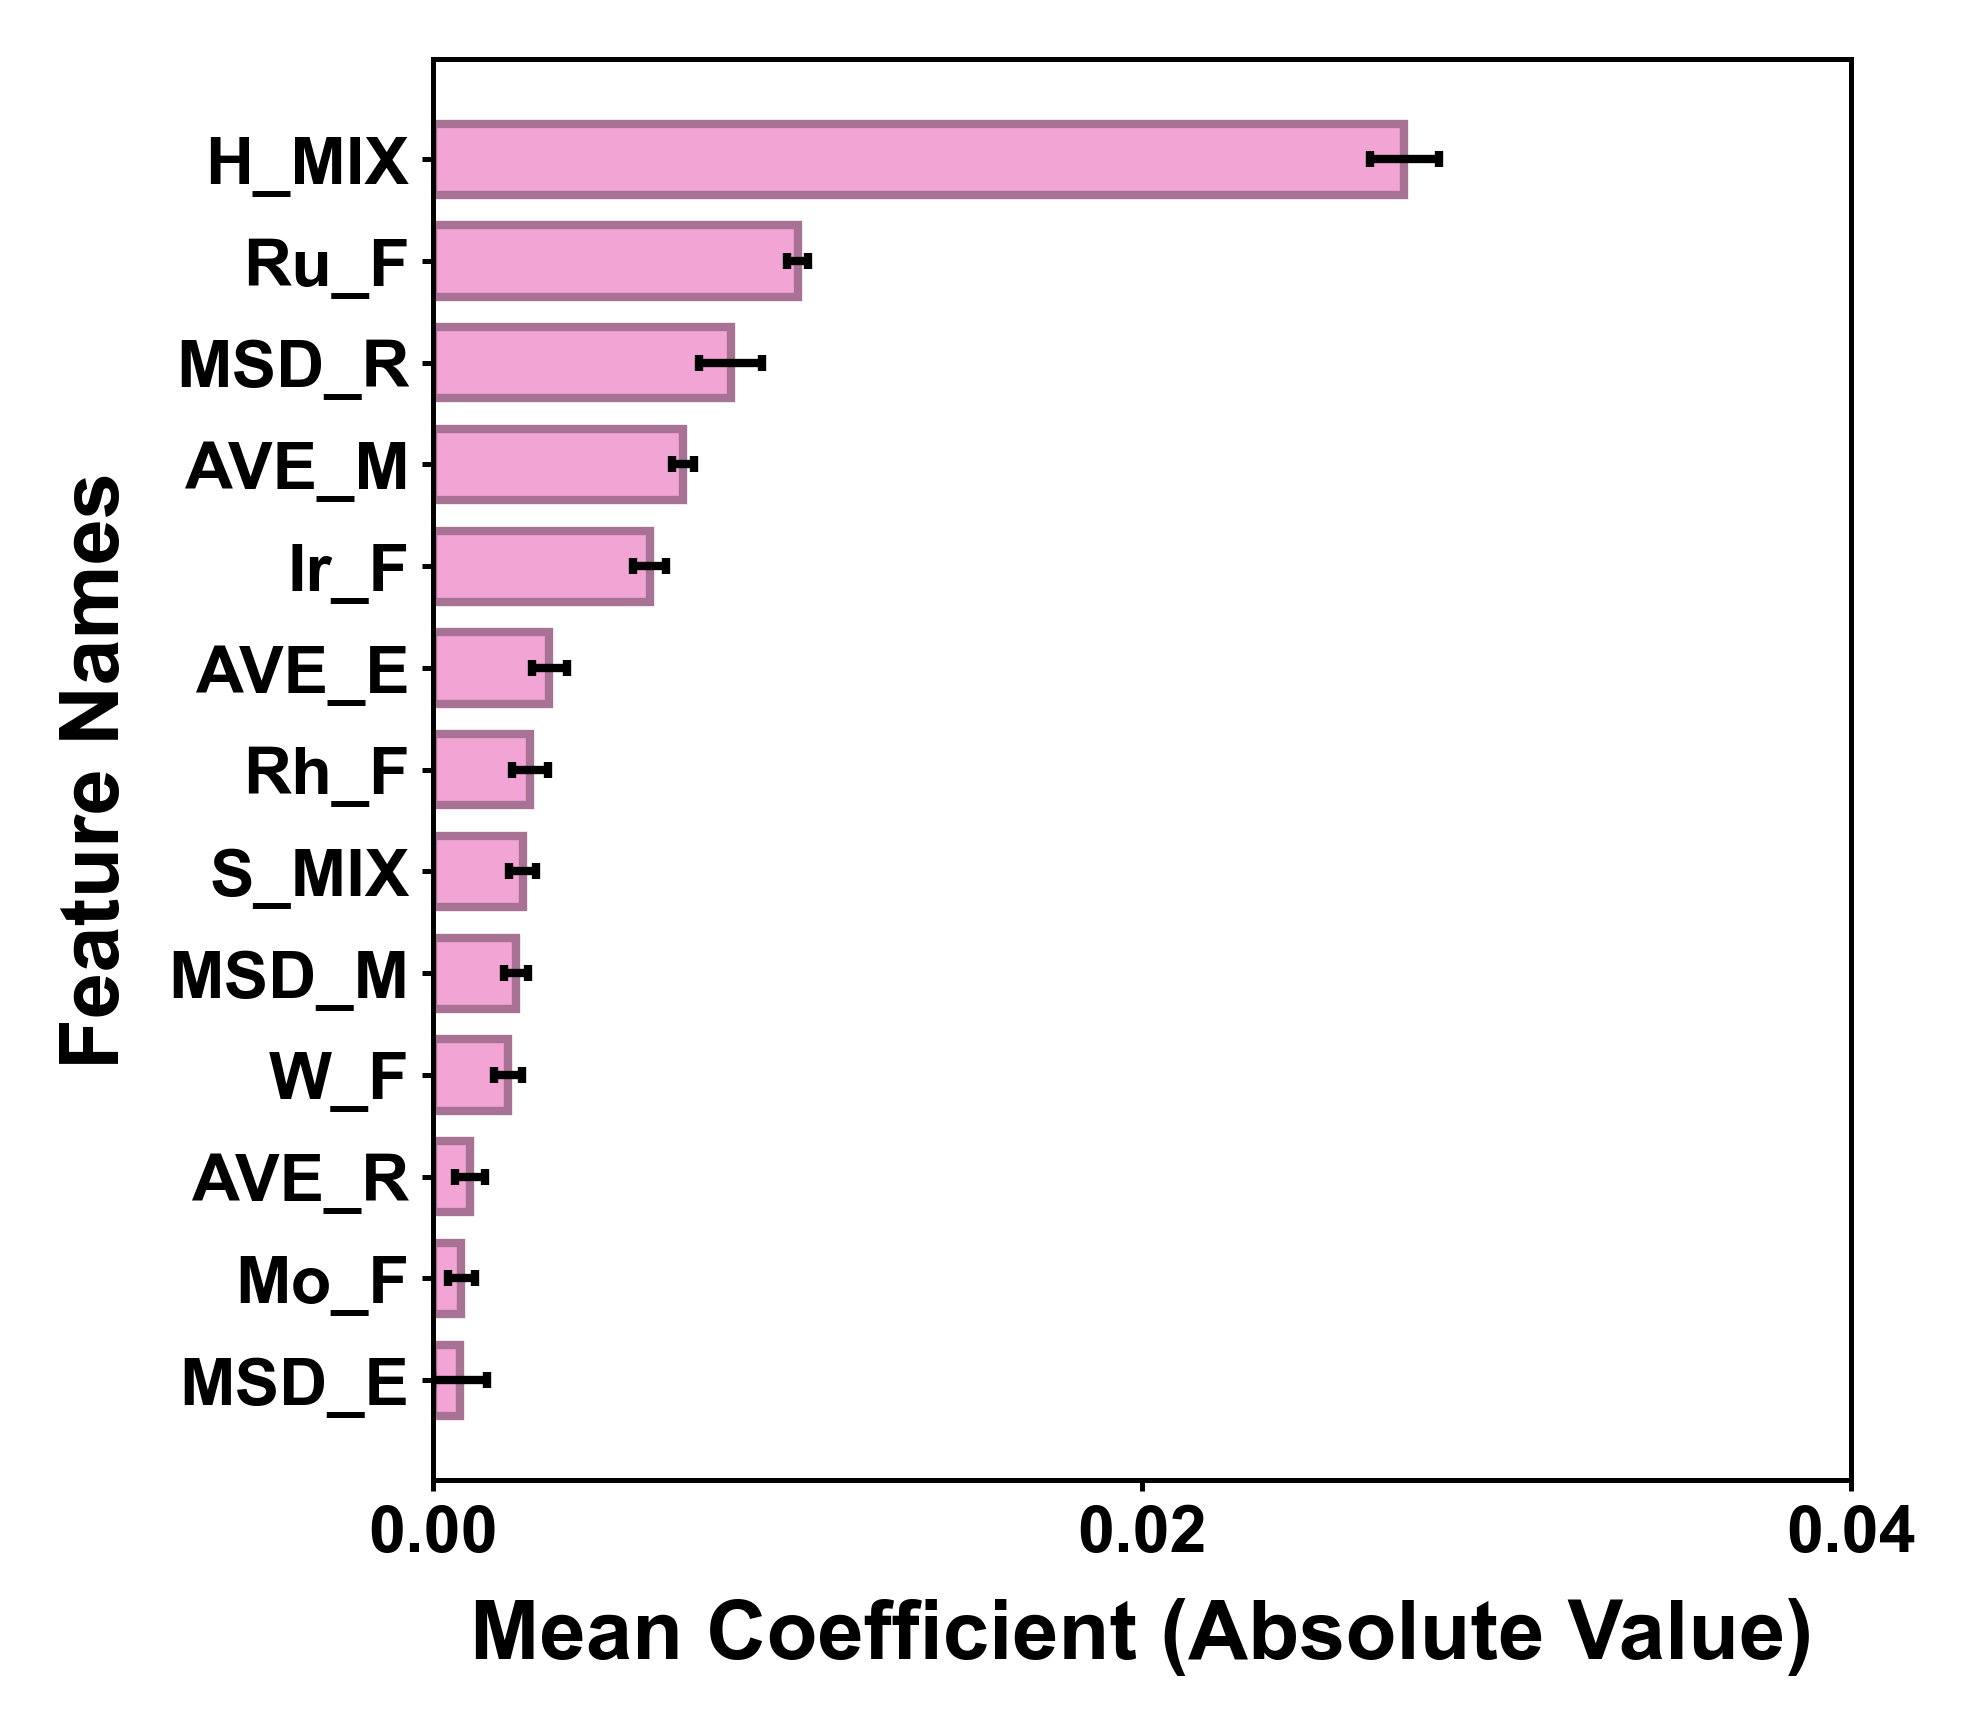

In [32]:

feature_imp_set=np.array(feature_imp_set)        

f_mean = np.mean(feature_imp_set, axis=0)
f_error=np.std(feature_imp_set, axis=0)


feature_importance=pd.concat((pd.DataFrame(X_col,columns=['feature']),
                              #pd.DataFrame(RFR_all.feature_importances_,columns=['importance']),
                              pd.DataFrame(f_mean,columns=['average_importance']),
                              pd.DataFrame(f_error,columns=['error'])),
                             axis=1).sort_values(by='average_importance',ascending=True)


print(feature_importance)

###############################################################################################

matplotlib.rcParams['ytick.labelsize'] = sss
matplotlib.rcParams['xtick.labelsize'] = sss

fig = plt.figure()

ax=fig.add_subplot(111)

#plt.barh(feature_importance['feature'], feature_importance['importance'],
#                       height=0.7, color='#8CC2FB', edgecolor='#073E8E')


ax.barh(feature_importance['feature'], feature_importance['average_importance'], xerr=feature_importance['error'], capsize=1,
        height=0.7, color='#f2a4d5', edgecolor='#a77293',linewidth=1)


ax.set_xlabel('Mean Coefficient (Absolute Value)')
ax.set_ylabel('Feature Names')
#plt.title('Feature Importances')


ax.set_xlim([0,0.04])
ax.xaxis.set_ticks(np.arange(0, 0.04, 0.02))


xmajorLocator   = MultipleLocator(0.02) 
ax.xaxis.set_major_locator(xmajorLocator)


#for i, v in enumerate(feature_importance['average_importance']):
#    ax.text(v + 0.002, i, f'{v:.4f}', va='center', fontsize=8)


#fig.tight_layout()
fig.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

plt.savefig('feature_importance_'+str(n)+'_all.pdf')
plt.show()

train Mean Absolute Error MAE: 0.00540831263237556
train rmse scores :  0.006621823557205978
train R2 scores :  0.9724857118207034


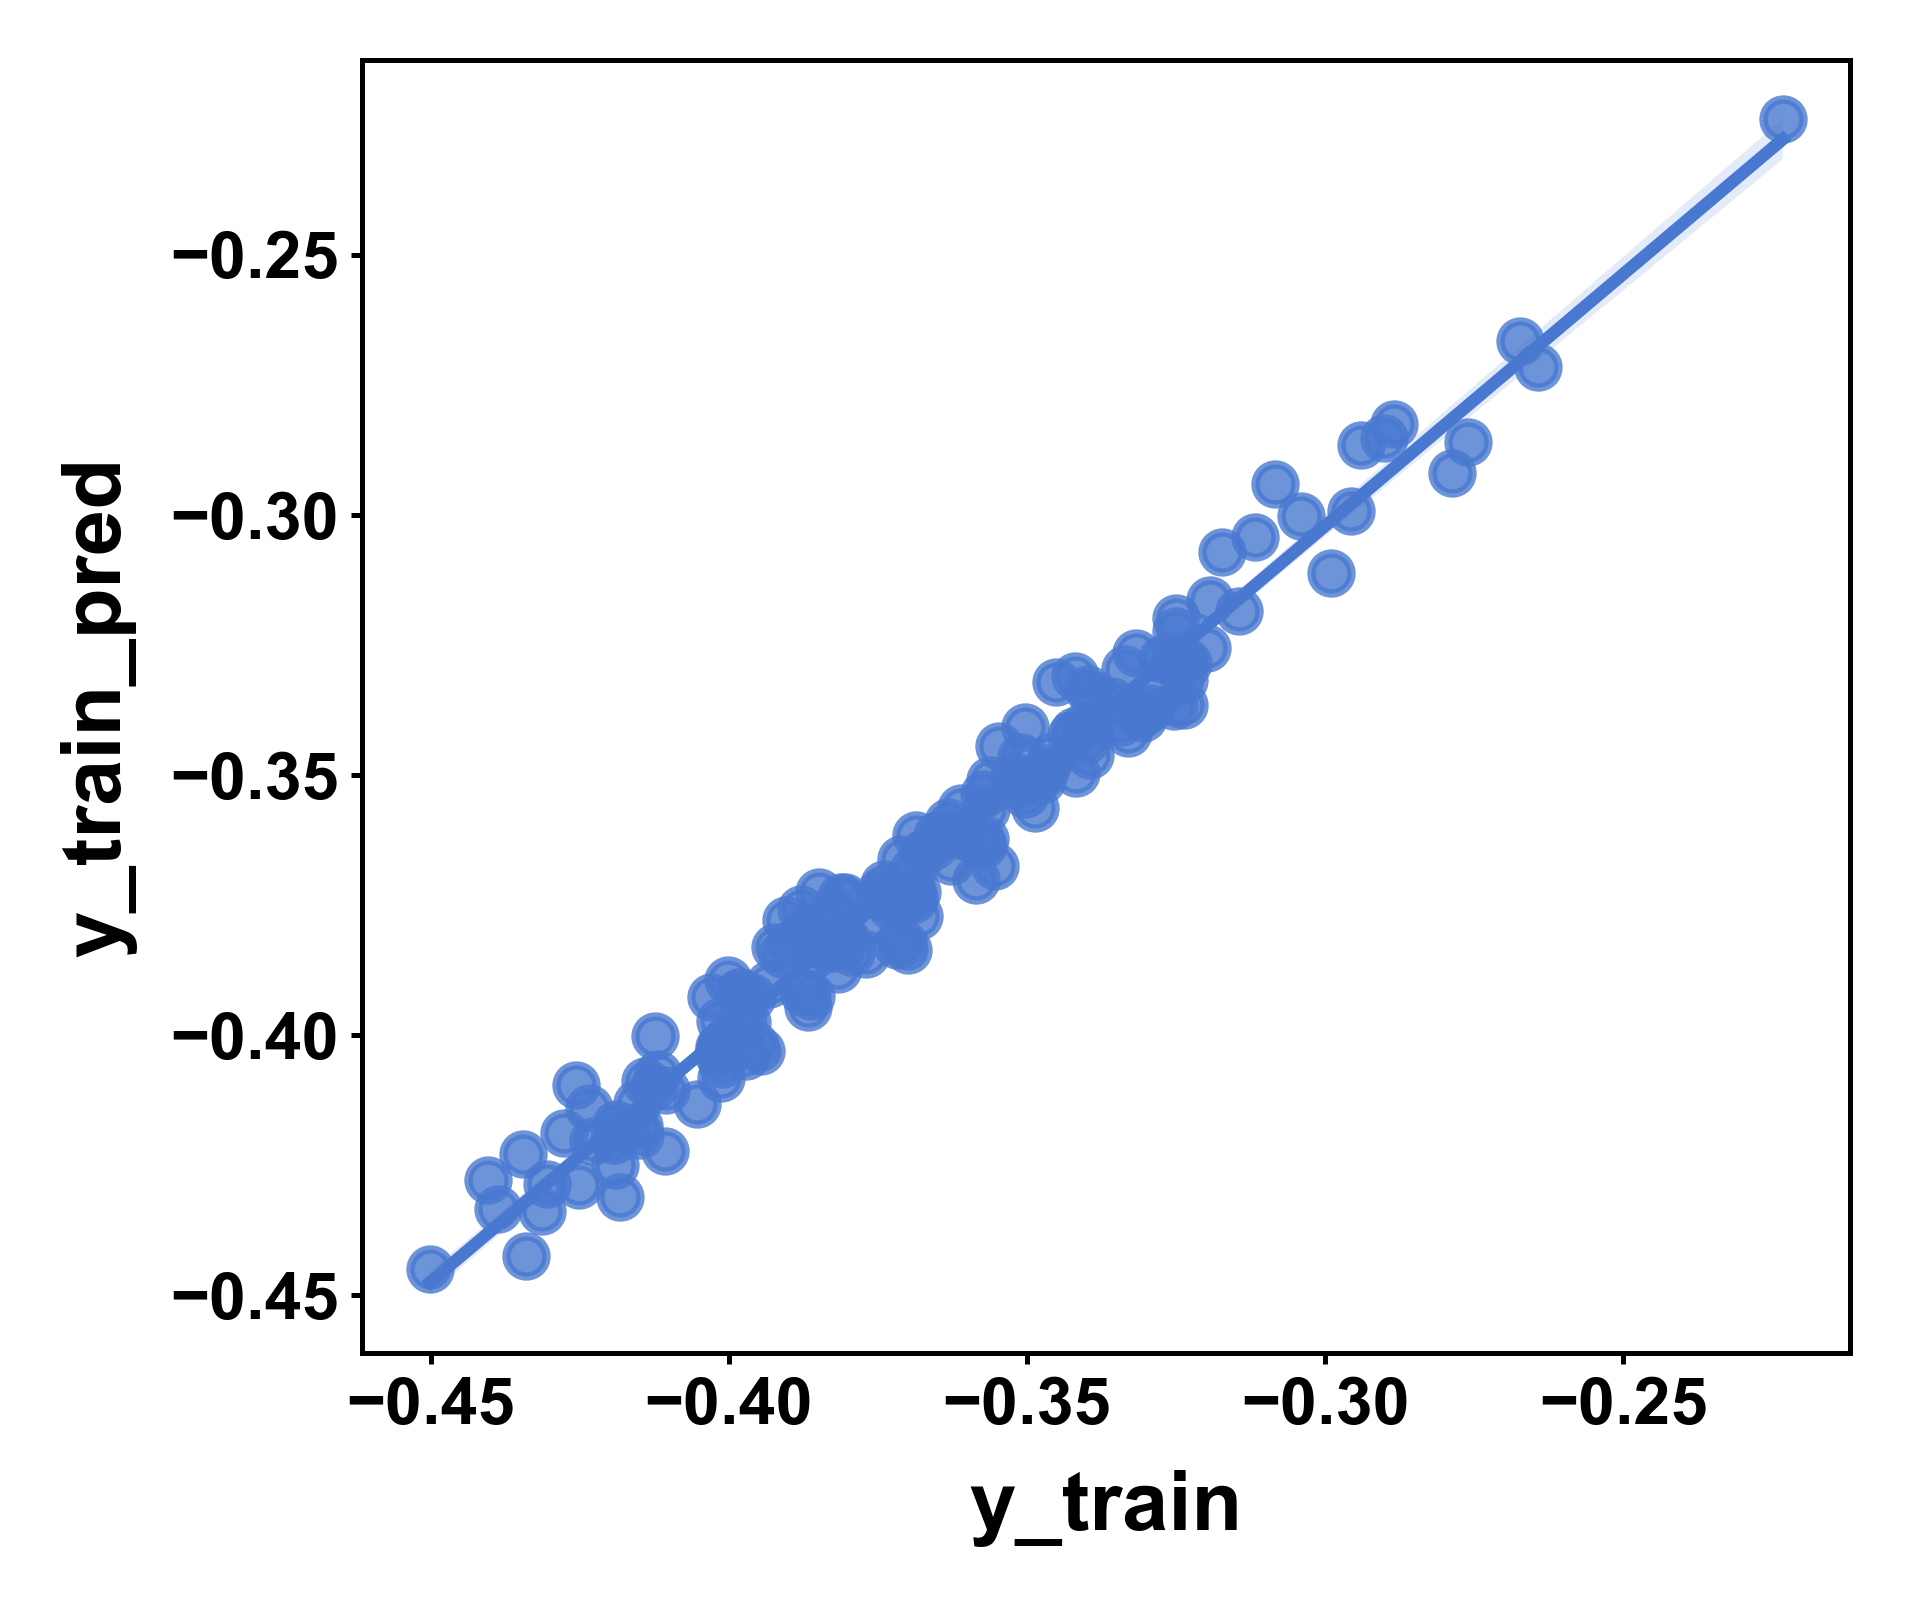

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_index=final_max_r2_index

X_train_best,X_test_best,y_train_best,y_test_best = train_test_split(X_all,y_all,test_size=0.2,shuffle=True,random_state=max_index) 


scaler_best = StandardScaler()
scaler_best.fit(X_train_best)
X_train_best_standard = scaler_best.transform(X_train_best)
X_test_best_standard = scaler_best.transform(X_test_best)
X_final_test_standard_best = scaler_best.transform(X_final_test)


RI_best = Ridge(alpha=float(list(max_data.keys())[0]))
RI_best.fit(X_train_best_standard, y_train_best)
y_train_best_pred=RI_best.predict(X_train_best_standard)

x_best_1,y_best_1=pd.Series(y_train_best,name='y_train'),pd.Series(y_train_best_pred,name='y_train_pred')
sns.regplot(x=x_best_1,y=y_best_1)
plt.show

#rmse_log = np.sqrt(mean_squared_error(np.log(y_test),np.log(abs(y_pred))))
rmse = np.sqrt(mean_squared_error(y_train_best, y_train_best_pred))
r2 = r2_score(y_train_best, y_train_best_pred)


print(f'train Mean Absolute Error MAE: {mean_absolute_error(y_train_best,y_train_best_pred)}')
print ('train rmse scores : ',rmse)
print ('train R2 scores : ',r2)

test Mean Absolute Error MAE: 0.005755989622825591
test rmse scores :  0.006751201021663325
test R2 scores :  0.9763486879579352


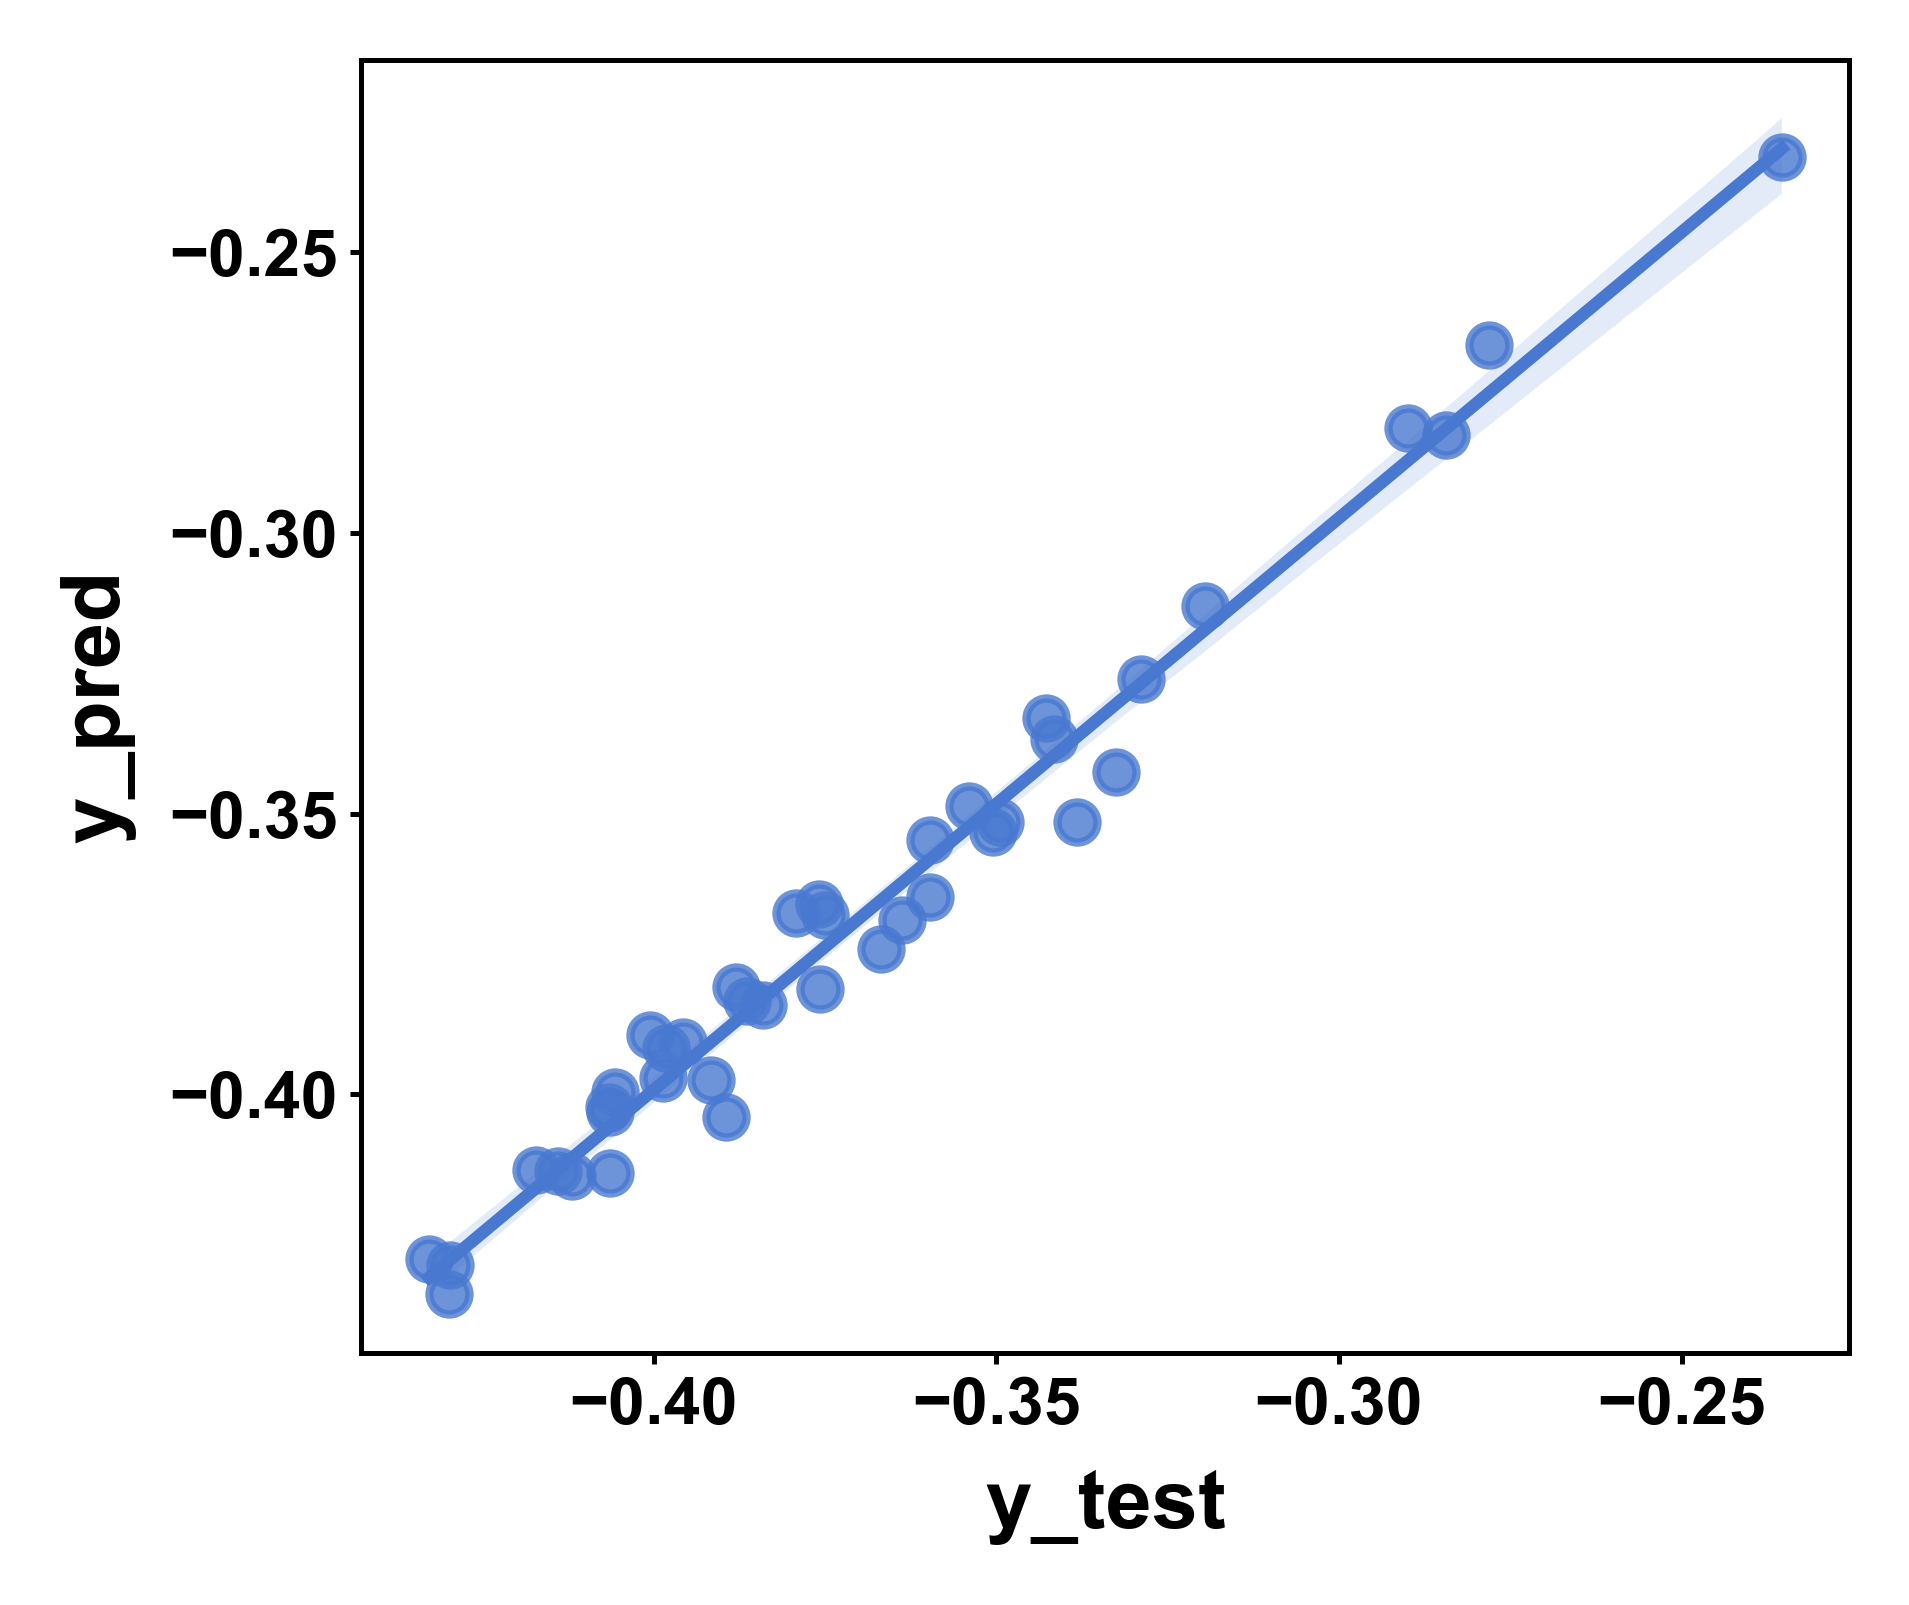

In [34]:

y_test_best_pred=RI_best.predict(X_test_best_standard)


x_best_2,y_best_2=pd.Series(y_test_best,name='y_test'),pd.Series(y_test_best_pred,name='y_pred')
sns.regplot(x=x_best_2,y=y_best_2)
plt.show

rmse = np.sqrt(mean_squared_error(y_test_best,y_test_best_pred))
r2 = r2_score(y_test_best,y_test_best_pred)


print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_test_best,y_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

test Mean Absolute Error MAE: 0.00562574711939341
test rmse scores :  0.0073116066542946515
test R2 scores :  0.9231282833780587


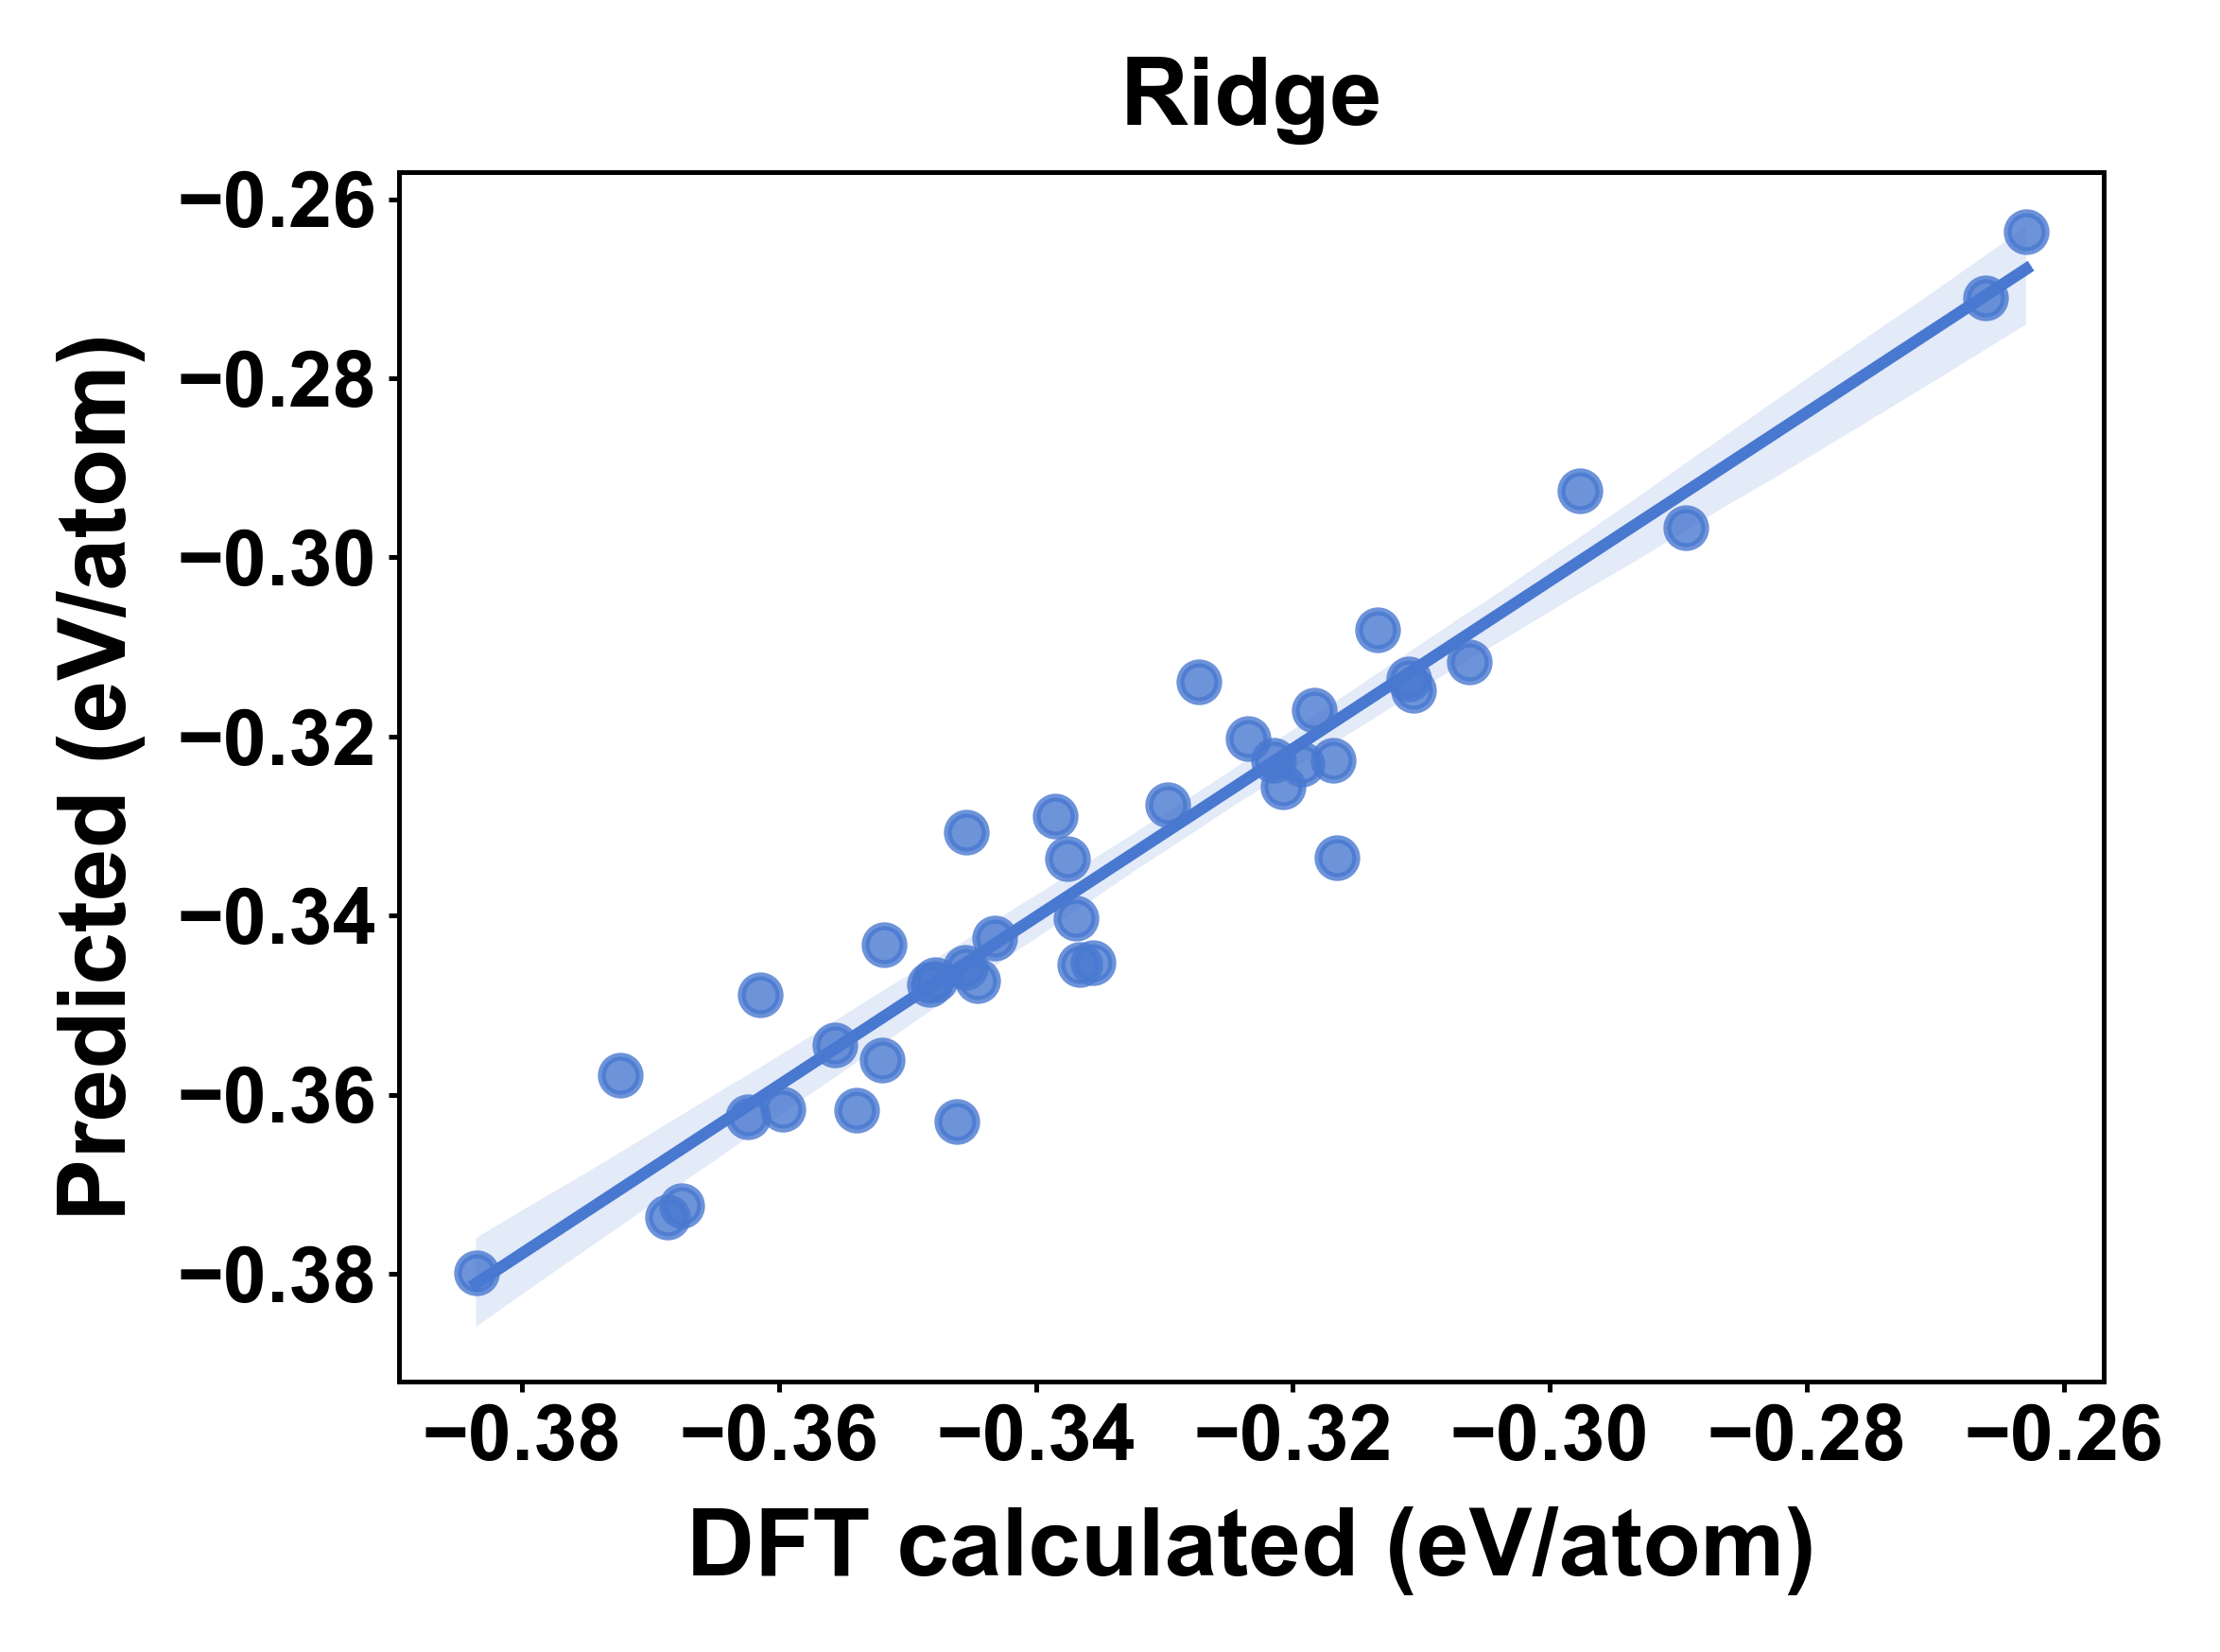

In [35]:

y_final_test_best_pred=RI_best.predict(X_final_test_standard_best)


x_best_3,y_best_3=pd.Series(y_final_test_np,name='DFT calculated (eV)'),pd.Series(y_final_test_best_pred,name='Predicted (eV)')
plt.figure(figsize=(4, 3))
sns.regplot(x=x_best_3, y=y_best_3)


plt.xlabel("DFT calculated (eV/atom)", fontsize=12)
plt.ylabel("Predicted (eV/atom)", fontsize=12)
plt.title('Ridge', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
#plt.savefig('validation.tif')
plt.savefig('validation.pdf')

rmse = np.sqrt(mean_squared_error(y_final_test_np,y_final_test_best_pred))  #用log缩小
r2 = r2_score(y_final_test_np,y_final_test_best_pred)
print(f'test Mean Absolute Error MAE: {mean_absolute_error(y_final_test_np,y_final_test_best_pred)}')
print ('test rmse scores : ',rmse)
print ('test R2 scores : ',r2)

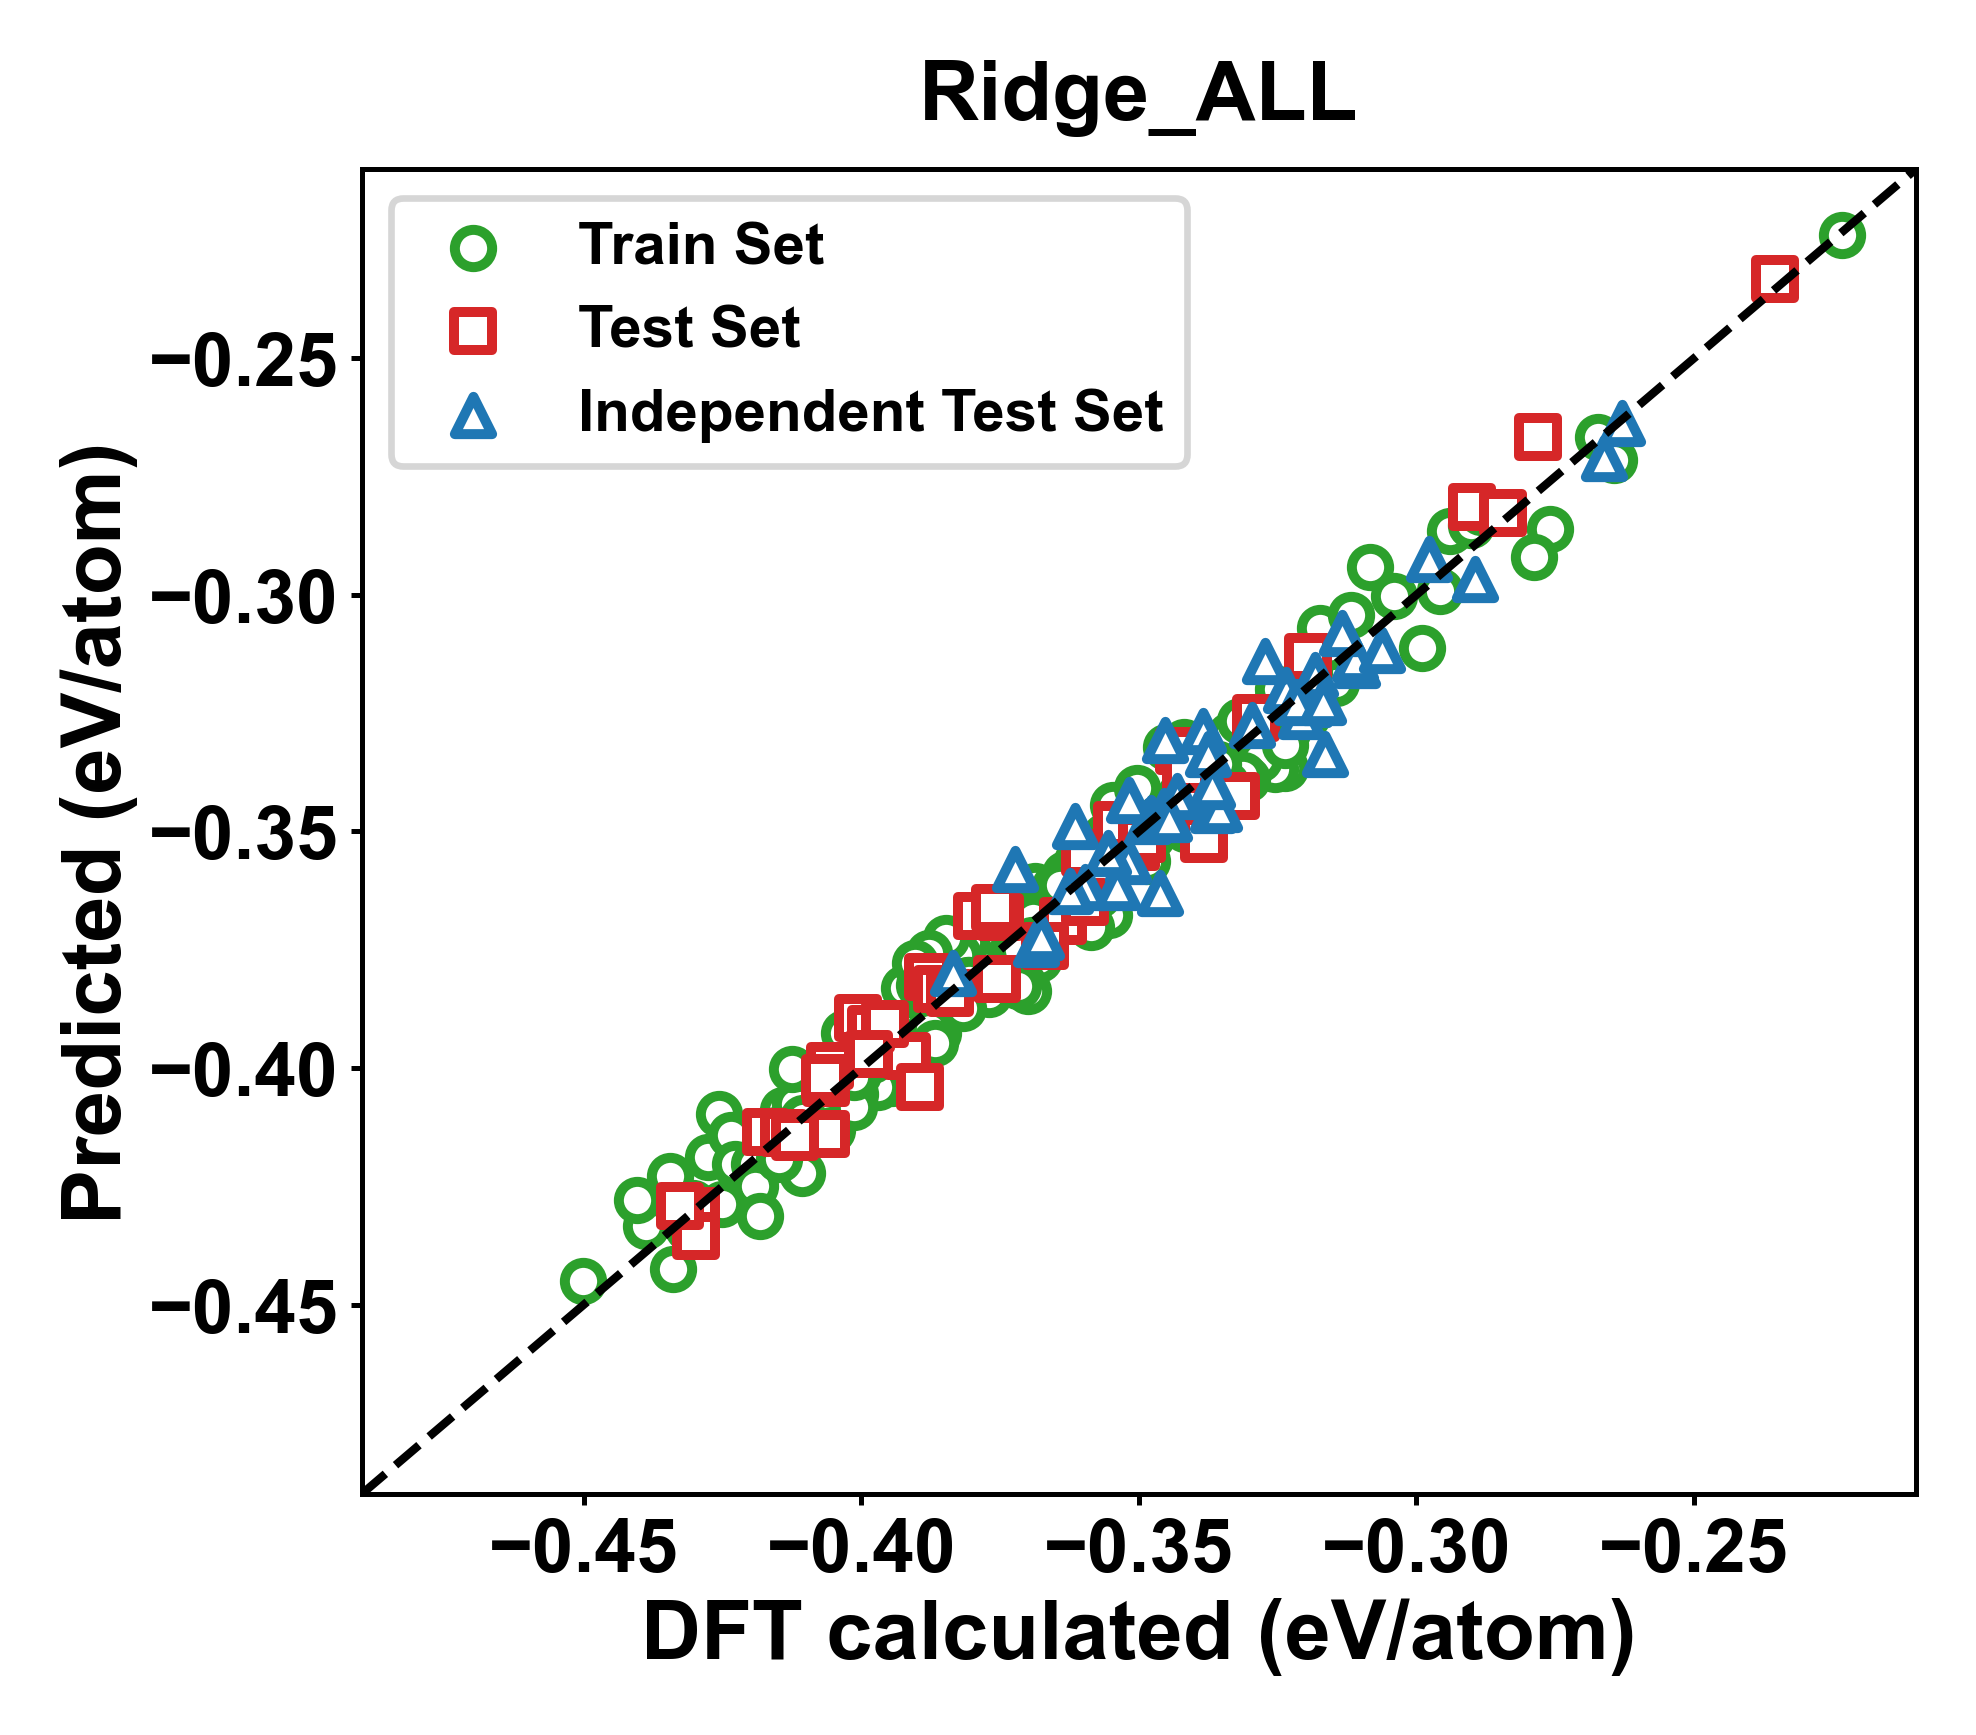

In [36]:
fig = plt.figure()
ax=fig.add_subplot(111)

ax.scatter(x_best_1,y_best_1,s=20,marker='o', color='w',  edgecolors='tab:green',linewidths=1.2, label = 'Train Set') 
ax.scatter(x_best_2,y_best_2,s=20,marker='s', color='w', edgecolors='tab:red',linewidths=1.2, label = 'Test Set')
ax.scatter(x_best_3,y_best_3,s=20,marker='^', color='w', edgecolors='tab:blue',linewidths=1.2, label = 'Independent Test Set')


x_r=[-0.49, -0.21]
y_r=[-0.49, -0.21]
ax.plot(x_r,y_r,'k--')


ax.legend(loc='upper left', markerscale=1, fontsize=7)


ax.set_xlabel('DFT calculated (eV/atom)',labelpad = 1.3)
ax.set_ylabel('Predicted (eV/atom)',labelpad = 1.3)
ax.set_title('Ridge_ALL', fontsize=10, fontweight='bold')
ax.tick_params(labelsize=9)


ax.set_xlim([-0.49,-0.21])  
ax.set_ylim([-0.49,-0.21])


xmajorLocator   = MultipleLocator(0.05) 
ax.xaxis.set_major_locator(xmajorLocator)

ymajorLocator   = MultipleLocator(0.05) 
ax.yaxis.set_major_locator(ymajorLocator)


#fig.tight_layout()
fig.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)

plt.savefig('Ridge.pdf')
plt.show()